In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import TruncatedSVD
import random
# import seaborn as sns
import os.path as path
import os
# import matplotlib
# import matplotlib.font_manager
# import matplotlib.pyplot as plt # graphs plotting
# import Bio
from Bio import SeqIO # some BioPython that will come in handy
#matplotlib inline

from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score


# from matplotlib import rc
# # for Arial typefont
# matplotlib.rcParams['font.family'] = 'Arial'

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn import svm

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import classification_report, confusion_matrix 

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from pandas import DataFrame

from sklearn.model_selection import KFold 
from sklearn.model_selection import RepeatedKFold

from sklearn.metrics import confusion_matrix

from numpy import mean

import seaborn as sns

import itertools
from itertools import product

import csv

import math

from sklearn.model_selection import ShuffleSplit # or StratifiedShuffleSplit

from sklearn.decomposition import KernelPCA

import timeit

import sys
from collections import defaultdict

import sys
from collections import defaultdict

print("Packages Loading Done!!!")

Packages Loading Done!!!


In [2]:
seq_data = np.load("E:/RA/Adversarial Attack/PacBio Dataset/NovaSeq_error_files/illumina_5000_novaseq_simulated_error_reduced_8220.npy",allow_pickle=True)


# OHE Logic

In [5]:
max_sequence_length = 0

for i in range(len(seq_data)):
    if len(seq_data[i])>=max_sequence_length:
        max_sequence_length = len(seq_data[i])
        
# Getting the unique values
res = list(set(i for j in seq_data for i in j))
  
# printing result
print ("Unique values : ", str(res))
print ("Unique values Length : ", len(res))
print ("Max Sequence Length : ", max_sequence_length)

Unique values :  ['T', 'G', 'C', 'A']
Unique values Length :  4
Max Sequence Length :  29912


In [6]:
# np.array(res).to_categorical() 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(res)
integer_encoded,max(integer_encoded)

(array([3, 2, 1, 0], dtype=int64), 3)

In [144]:
final_data = []
for ind in range(len(seq_data)):
    print(ind,"/",len(seq_data))
    asd = list(str(seq_data[ind]))
    for i in range(len(res)):
#         asd = np.where(asd == res[i], integer_encoded[i], asd)
        asd = list(map(lambda x: x.replace(res[i], str(integer_encoded[i])), asd))
    final_data.append(asd)


0 / 8220
1 / 8220
2 / 8220
3 / 8220
4 / 8220
5 / 8220
6 / 8220
7 / 8220
8 / 8220
9 / 8220
10 / 8220
11 / 8220
12 / 8220
13 / 8220
14 / 8220
15 / 8220
16 / 8220
17 / 8220
18 / 8220
19 / 8220
20 / 8220
21 / 8220
22 / 8220
23 / 8220
24 / 8220
25 / 8220
26 / 8220
27 / 8220
28 / 8220
29 / 8220
30 / 8220
31 / 8220
32 / 8220
33 / 8220
34 / 8220
35 / 8220
36 / 8220
37 / 8220
38 / 8220
39 / 8220
40 / 8220
41 / 8220
42 / 8220
43 / 8220
44 / 8220
45 / 8220
46 / 8220
47 / 8220
48 / 8220
49 / 8220
50 / 8220
51 / 8220
52 / 8220
53 / 8220
54 / 8220
55 / 8220
56 / 8220
57 / 8220
58 / 8220
59 / 8220
60 / 8220
61 / 8220
62 / 8220
63 / 8220
64 / 8220
65 / 8220
66 / 8220
67 / 8220
68 / 8220
69 / 8220
70 / 8220
71 / 8220
72 / 8220
73 / 8220
74 / 8220
75 / 8220
76 / 8220
77 / 8220
78 / 8220
79 / 8220
80 / 8220
81 / 8220
82 / 8220
83 / 8220
84 / 8220
85 / 8220
86 / 8220
87 / 8220
88 / 8220
89 / 8220
90 / 8220
91 / 8220
92 / 8220
93 / 8220
94 / 8220
95 / 8220
96 / 8220
97 / 8220
98 / 8220
99 / 8220
100 / 8220

In [148]:
# final_data[0]

In [ ]:
def flatten_list(_2d_list):
    flat_list = []
    # Iterate through the outer list
    for element in _2d_list:
        if type(element) is list:
            # If the element is of type list, iterate through the sublist
            for item in element:
                flat_list.append(item)
        else:
            flat_list.append(element)
    return flat_list

In [ ]:
one_hot_data = []
ohe_vector_length = len(res)*max_sequence_length
for i in range(len(final_data)):
    print(i,"/",len(final_data))
    row_wise = (final_data[i])
    
#     row_wise = []
#     for w in range(len(seq_1)):
#         if seq_1[w]=='A' or seq_1[w]=='C' or seq_1[w]=='G' or seq_1[w]=='T':
#             row_wise.append(seq_1[w])
#         else:
#             row_wise.append("-")
            
    row_vector = []
    for j in range(len(row_wise)):
        temp_vector = [0]* len(res)
        temp_vector[int(row_wise[j])] = 1
        row_vector.append(list(temp_vector))
    row_vec = flatten_list(row_vector)
    if(len(row_vec)<ohe_vector_length):
        for k in range(len(row_vec),ohe_vector_length):
            row_vec.append(0)
    one_hot_data.append(row_vec)

0 / 8220
1 / 8220
2 / 8220
3 / 8220
4 / 8220
5 / 8220
6 / 8220
7 / 8220
8 / 8220
9 / 8220
10 / 8220
11 / 8220
12 / 8220
13 / 8220
14 / 8220
15 / 8220
16 / 8220
17 / 8220
18 / 8220
19 / 8220
20 / 8220
21 / 8220
22 / 8220
23 / 8220
24 / 8220
25 / 8220
26 / 8220
27 / 8220
28 / 8220
29 / 8220
30 / 8220
31 / 8220
32 / 8220
33 / 8220
34 / 8220
35 / 8220
36 / 8220
37 / 8220
38 / 8220
39 / 8220
40 / 8220
41 / 8220
42 / 8220
43 / 8220
44 / 8220
45 / 8220
46 / 8220
47 / 8220
48 / 8220
49 / 8220
50 / 8220
51 / 8220
52 / 8220
53 / 8220
54 / 8220
55 / 8220
56 / 8220
57 / 8220
58 / 8220
59 / 8220
60 / 8220
61 / 8220
62 / 8220
63 / 8220
64 / 8220
65 / 8220
66 / 8220
67 / 8220
68 / 8220
69 / 8220
70 / 8220
71 / 8220
72 / 8220
73 / 8220
74 / 8220
75 / 8220
76 / 8220
77 / 8220
78 / 8220
79 / 8220
80 / 8220
81 / 8220
82 / 8220
83 / 8220
84 / 8220
85 / 8220
86 / 8220
87 / 8220
88 / 8220
89 / 8220
90 / 8220
91 / 8220
92 / 8220
93 / 8220
94 / 8220
95 / 8220
96 / 8220
97 / 8220
98 / 8220
99 / 8220
100 / 8220

In [ ]:


# one_hot_data = []
# ohe_vector_length = len(res)*max_sequence_length
# for i in range(len(final_data)):
#     seq_1 = list(str(final_data[i]))
    
#     row_wise = []
#     for w in range(len(seq_1)):
#         if seq_1[w]=='A' or seq_1[w]=='C' or seq_1[w]=='G' or seq_1[w]=='T':
#             row_wise.append(seq_1[w])
#         else:
#             row_wise.append("-")
            
#     row_vector = []
#     for j in range(len(row_wise)):
#         temp_vector = [0]* len(res)
#         temp_vector[int(row_wise[j])] = 1
#         row_vector.append(list(temp_vector))
#     row_vec = flatten_list(row_vector)
#     if(len(row_vec)<ohe_vector_length):
#         for k in range(len(row_vec),ohe_vector_length):
#             row_vec.append(0)
#     one_hot_data.append(row_vec)

In [ ]:
# row_wise

# Minimizer Logic

In [9]:
def compute_minimizers(s, k, m, debug = False) :
    minimizers = defaultdict(int) # frequency vector

    queue = []
    mi = None # index in queue of the current minimizer
    for i in range(len(s) - k + 1) :
        kmer = s[i:i+k]

        if mi :

            queue.pop(0) # out with the old
            mmer = s[i+k-m:i+k] # in with the new
            mi -= 1 # shift index back

            mmer = min(mmer, mmer[::-1]) # lexicographically smallest forward/reverse
            queue.append(mmer)

            if mmer < queue[mi] : # update with new
                mi = k-m

        else :
            queue = [] # reset the queue, start from scratch

            mi = 0 # first m-mer
            for j in range(k - m + 1) :
                mmer = kmer[j:j+m]
                mmer = min(mmer, mmer[::-1])
                queue.append(mmer)

                if mmer < queue[mi] : # keep track of current minimizer
                    mi = j

        minimizers[queue[mi]] += 1 # update frequency vector

#         if debug :
#             print(kmer, '->', queue[mi])

    return minimizers

In [12]:
# seq_data = np.load("E:/RA/Adversarial Attack/PacBio Dataset/Feature_Vectors/org_red_seq_8220.npy",allow_pickle=True)
# seq_data = np.load("E:/RA/Adversarial Attack/Dataset/Reduced_preprocessed/depth_10_red_seq_new_8220.npy",allow_pickle=True)
# seq_data = np.load("E:/RA/Adversarial Attack/PacBio Dataset/NovaSeq_error_files/illumina_5000_novaseq_simulated_error_reduced_8220.npy",allow_pickle=True)
seq_data = np.load("E:/RA/Adversarial Attack/PacBio Dataset/NovaSeq_error_files/illumina_10000_novaseq_simulated_error_reduced_8220.npy",allow_pickle=True)



start = timeit.default_timer()
 

Kmer = 9
m_mers = 3
unique_seq_kmers_final_list = [''.join(c) for c in product('ACGT-', repeat=3)]  

final_feature_vector = []
frequency_vector = []
for ind_loop in range(len(seq_data)):
# for ind_loop in range(0,1):
    print("Index :",ind_loop,"/",len(seq_data))
    seq_1 = seq_data[ind_loop]
    
    seq = []
    for w in range(len(seq_1)):
        if seq_1[w]=='A' or seq_1[w]=='C' or seq_1[w]=='G' or seq_1[w]=='T':
            seq.append(seq_1[w])
        else:
            seq.append("-")
    
    ################ Generate minimizers (Start) #########################

    aa = str(list(seq))
    aa_1 = aa.replace("[","")
    aa_2 = aa_1.replace("]","")
    aa_3 = aa_2.replace("\'","")
    aa_4 = aa_3.replace(",","")
    aa_5 = aa_4.replace(" ","")
    
    tmp = compute_minimizers(aa_5, Kmer, m_mers)
    k_mers_final = list(tmp)
    m_mers_values = tmp.values()
    
    ################ Generate minimizers (Ends) #########################

    
    listofzeros = [0] * len(unique_seq_kmers_final_list)
    #cnt_check2 = 0
    for ii in range(len(k_mers_final)):
        seq_tmp = k_mers_final[ii]
        
#         for j in range(len(seq_tmp)):
        ind_tmp = unique_seq_kmers_final_list.index(seq_tmp)
        aaaaa = list(m_mers_values)
        listofzeros[ind_tmp] = aaaaa[ii]
    frequency_vector.append(listofzeros)
    
stop = timeit.default_timer()
print("Min2Vec Time : ", stop - start)

##############################################################################################################
    
# np.save("/alina-data1/sarwan/Adversarial_Attack/Feature_Vectors/Min2Vec_org_red_seq_8220.npy",final_feature_vector)

Index : 0 / 8220
Index : 1 / 8220
Index : 2 / 8220
Index : 3 / 8220
Index : 4 / 8220
Index : 5 / 8220
Index : 6 / 8220
Index : 7 / 8220
Index : 8 / 8220
Index : 9 / 8220
Index : 10 / 8220
Index : 11 / 8220
Index : 12 / 8220
Index : 13 / 8220
Index : 14 / 8220
Index : 15 / 8220
Index : 16 / 8220
Index : 17 / 8220
Index : 18 / 8220
Index : 19 / 8220
Index : 20 / 8220
Index : 21 / 8220
Index : 22 / 8220
Index : 23 / 8220
Index : 24 / 8220
Index : 25 / 8220
Index : 26 / 8220
Index : 27 / 8220
Index : 28 / 8220
Index : 29 / 8220
Index : 30 / 8220
Index : 31 / 8220
Index : 32 / 8220
Index : 33 / 8220
Index : 34 / 8220
Index : 35 / 8220
Index : 36 / 8220
Index : 37 / 8220
Index : 38 / 8220
Index : 39 / 8220
Index : 40 / 8220
Index : 41 / 8220
Index : 42 / 8220
Index : 43 / 8220
Index : 44 / 8220
Index : 45 / 8220
Index : 46 / 8220
Index : 47 / 8220
Index : 48 / 8220
Index : 49 / 8220
Index : 50 / 8220
Index : 51 / 8220
Index : 52 / 8220
Index : 53 / 8220
Index : 54 / 8220
Index : 55 / 8220
In

In [ ]:
type(frequency_vector[0])

In [13]:
# np.save("E:/RA/Adversarial Attack/PacBio Dataset/Feature_Vectors/Min2Vec_depth_10_red_seq_8220.npy",frequency_vector)

np.save("E:/RA/Adversarial Attack/PacBio Dataset/NovaSeq_error_files/Min2Vec_illumina_10000_red_seq_8220.npy",frequency_vector)

In [ ]:
def compute_kmers(s, k, m, debug = False) :
    minimizers = defaultdict(int) # frequency vector

    queue = []
    mi = None # index in queue of the current minimizer
    for i in range(len(s) - k + 1) :
        kmer = s[i:i+k]

        if mi :

            queue.pop(0) # out with the old
            mmer = s[i+k-m:i+k] # in with the new
            mi -= 1 # shift index back

            mmer = min(mmer, mmer[::-1]) # lexicographically smallest forward/reverse
            queue.append(mmer)

            if mmer < queue[mi] : # update with new
                mi = k-m

        else :
            queue = [] # reset the queue, start from scratch

            mi = 0 # first m-mer
            for j in range(k - m + 1) :
                mmer = kmer[j:j+m]
                mmer = min(mmer, mmer[::-1])
                queue.append(mmer)

                if mmer < queue[mi] : # keep track of current minimizer
                    mi = j

        minimizers[queue[mi]] += 1 # update frequency vector

#         if debug :
#             print(kmer, '->', queue[mi])

    return minimizers

# t-SNE logic

In [30]:
seq_data = np.load("E:/RA/Adversarial Attack/PacBio Dataset/Feature_Vectors/Min2Vec_org_red_seq_8220.npy",allow_pickle=True)
attribute_data = np.load("E:/RA/Adversarial Attack/Dataset/Reduced_preprocessed/variant_names_8220.npy",allow_pickle=True)

host_names = attribute_data
unique_hst = list(np.unique(host_names))
len(unique_hst)

int_hosts = []
for ind_unique in range(len(host_names)):
    variant_tmp = host_names[ind_unique]
    ind_tmp = unique_hst.index(variant_tmp)
    int_hosts.append(ind_tmp)
    
print("Attribute data preprocessing Done")

Attribute data preprocessing Done


In [31]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt # graphs plotting
import matplotlib.cm as cm
import seaborn as sns

# We embed all our sequences into 2D vectors with help of TSNE
X_embedded_orig = TSNE(n_components = 2, perplexity = 30, random_state = 1).fit_transform(seq_data)


C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [32]:
len(np.unique(attribute_data))

41

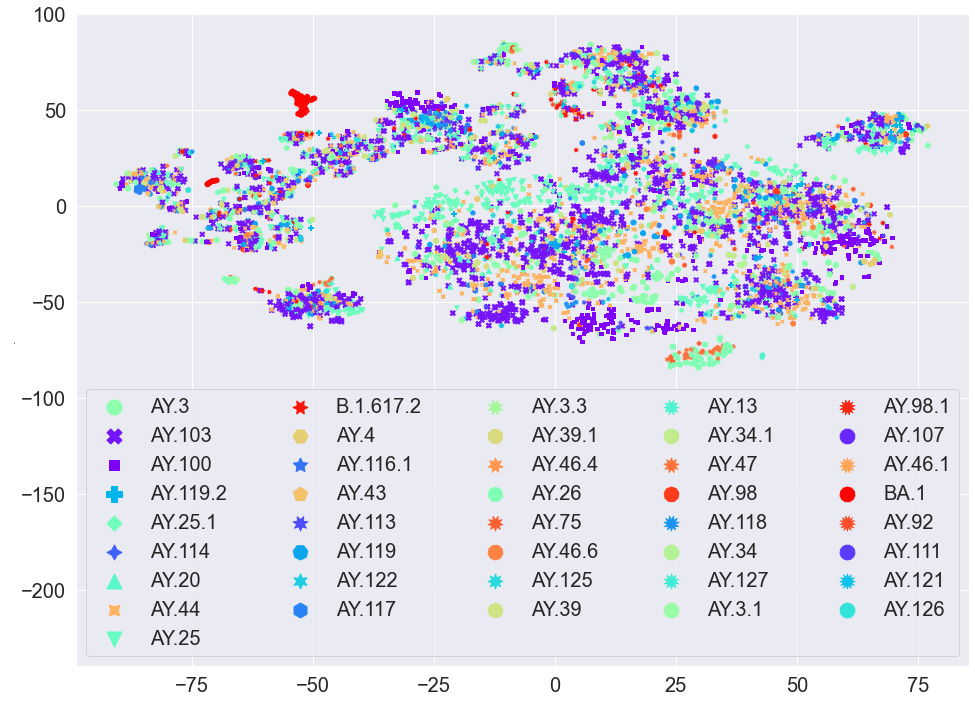

In [33]:
az = attribute_data
X_embedded_orig_final2 = np.array(X_embedded_orig)

colors = cm.rainbow(np.linspace(0, 1, len(np.unique(az))))
len(np.unique(az))

hst = np.unique(az)
order_top_hosts =  az

colors_top_hosts = {hst[0] : colors[0],hst[1] : colors[1],hst[2] : colors[2],hst[3] : colors[3],hst[4] : colors[4],
                   hst[5] : colors[5],hst[6] : colors[6],hst[7] : colors[7],hst[8] : colors[8],hst[9] : colors[9],
                   hst[10] : colors[10],hst[11] : colors[11],hst[12] : colors[12],hst[13] : colors[13],hst[14] : colors[14],
                   hst[15] : colors[15],hst[16] : colors[16],hst[17] : colors[17],hst[18] : colors[18],hst[19] : colors[19],
                   hst[20] : colors[20],hst[21] : colors[21],hst[22] : colors[22],hst[23] : colors[23],hst[24] : colors[24],
                   hst[25] : colors[25],hst[26] : colors[26],hst[27] : colors[27],hst[28] : colors[28],hst[29] : colors[29],
                   hst[30] : colors[30],hst[31] : colors[31],hst[32] : colors[32],hst[33] : colors[33],hst[34] : colors[34],
                   hst[35] : colors[35],hst[36] : colors[36],hst[37] : colors[37],hst[38] : colors[38],hst[39] : colors[39],
                   hst[40] : colors[40]}


data_frame_top_hosts = pd.DataFrame({' ': 
                                   np.array(X_embedded_orig_final2[:,0]), 
                           '.': np.array(X_embedded_orig_final2[:,1]), 
                           'Variants:': az})

sns.set(rc={'figure.figsize':(16,12)})

sns.scatterplot(x = ' ', 
            y = '.', 
            hue = 'Variants:', 
            hue_order = order_top_hosts,
#             markers = ordered_markers_top_hosts,
            palette = colors_top_hosts,
            data = data_frame_top_hosts,           
#             legend = 'full',
#             ax = ax12,
#             s = 100,
            linewidth=0.01,
            style = 'Variants:')
plt.ylim(-240, 100)
# plt.xlim(-80, 80)
# plt.xlabel("Steps Taken Per Day", fontsize=14)
# plt.ylabel("Calories Burned Per Day", fontsize=14)
plt.tick_params(labelsize=20)
# plt.legend(fontsize=0)
# plt.legend(fontsize=30, mode = "expand", ncol = 5)
# lgnd = plt.legend(loc="lower left", numpoints=1, fontsize=10)

lgnd = plt.legend(loc="lower left", scatterpoints=1, fontsize=20, mode = "expand", ncol = 5)
for handle in lgnd.legendHandles:
    handle.set_sizes([226.0])

# write_path = "E:/University/2nd Semester/IoT/Project/Data/UCI Data/hand_uci.png"
write_path = "E:/RA/Adversarial Attack/PacBio Dataset/tsne/min2vec.png"

plt.savefig(write_path)